<a href="https://colab.research.google.com/github/khaylee1/Data-analysis-files-for-future-reference-/blob/main/CNC_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<Center><b> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; IHC Past-due Accounts Report <br><br>
<b><i> Prepared By: Khayle Anthony L Embuscado</i></b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;IT Intern

In [ ]:
#@title
#libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount ('/content/drive')
%matplotlib inline

Mounted at /content/drive


In [ ]:
#            User Manual

# 1.) Upload the excel file to Google Drive
# 2.) download the excel file as CSV file
# 3.) upload the CSV file to Google Drive
# 4.) click the sent google colab link
# 5.) click runtime then click run all
# 6.) Navigate the uploaded csv file in google colab
# 7.) copy the file path of the csv file
# 8.) paste the file path link below
dataset="/content/drive/MyDrive/OJT IHC/cnc_final.xlsx - delinquent accounts.csv" ## paste the file path here
market_data = pd.read_csv(dataset)
# 9.) click runtime then click run all

#<b>Summary of Past-Due Accounts


In [ ]:
#@title
#count of accounts
p1_data= pd.DataFrame(market_data[market_data['Aging  (P1, P2 & P3)']=="P1"])
p2_data= pd.DataFrame(market_data[market_data['Aging  (P1, P2 & P3)']=="P2"])
p3_data= pd.DataFrame(market_data[market_data['Aging  (P1, P2 & P3)']=="P3"])
p0_data= pd.DataFrame(market_data[market_data['Aging  (P1, P2 & P3)']=="0"])
p1_total = p1_data['Project'].count()
p2_total = p2_data['Project'].count()
p3_total = p3_data['Project'].count()
p0_total = p0_data['Project'].count()
bracket_sum= p1_total+p2_total+p3_total+p0_total

#Total arrears
p1 = p1_data[' Total Arrears '].str.replace(',','',n=1).astype(float).sum()
peso1= (format(p1,",.1f"))
p2 = p2_data[' Total Arrears '].str.replace(',','',n=1).astype(float).sum()
peso2= (format(p2,",.1f"))
p3 = p3_data[' Total Arrears '].str.replace(',','',n=1).astype(float).sum()
peso3= (format(p3,",.1f"))
p0 = p0_data[' Total Arrears '].str.replace(',','',n=1).astype(float).sum()
peso0= (format(p0,",.1f"))
sum = p1+p2+p3+p0
arrears_sum = (format(sum,",.1f"))

# total penalty
pen1 = p1_data['Penalty (2%)'].str.replace(',','',n=1).astype(float).sum()
penalty1= (format(pen1,",.1f"))
pen2 = p2_data['Penalty (2%)'].str.replace(',','',n=1).astype(float).sum()
penalty2= (format(pen2,",.1f"))
pen3 = p3_data['Penalty (2%)'].str.replace(',','',n=1).astype(float).sum()
penalty3= (format(pen3,",.1f"))
pen0 = p0_data['Penalty (2%)'].str.replace(',','',n=1).astype(float).sum()
penalty0= (format(pen0,",.1f"))
sum_penalty = pen1+pen2+pen3+pen0
sum_pen= (format(sum_penalty,",.1f"))

#Grand total
gt1  = p1 + pen1
gt_1 = (format(gt1,",.1f"))
gt2  = p2 + pen2
gt_2 = (format(gt2,",.1f"))
gt3  = p3 + pen1
gt_3 = (format(gt3,",.1f"))
gt0  = p0 + pen0
gt_0 = (format(gt0,",.1f"))
gt_t = sum + sum_penalty
gt_total = (format(gt_t,",.1f"))

#DataFrame
summary = {
  'Bracket'  :['P1','P2','P3','Below 120','Total'],
  'Number of Accounts'  :[p1_total,p2_total,p3_total,p0_total,bracket_sum],
  'Total Arrears per Bracket'  :[peso1,peso2,peso3,peso0,arrears_sum],
  'Penalty' : [penalty1,penalty2,penalty3,penalty0,sum_pen],
  'Total Past Due' : [gt_1,gt_2,gt_3,gt_0,gt_total]
}
df1 = pd.DataFrame(summary)
df1.head().style.set_table_styles(
    [{'selector': 'th',
      'props': [('background','#FFC733'),
                ('color','black'),
                ('font-family','verdana')]},

     {'selector': 'td',
       'props':[('font-family','verdana')]},

     {'selector': 'tr:nth-of-type(oddd)',
      'props':[('background','#DCDCDC')]},

     {'selector': 'tr:nth-of-type(even)',
      'props':[('background','white')]},

      {'selector': 'tr:hover',
      'props':[('background-color','#FFFC33 ')]},



    ]
).hide_index()


Bracket,Number of Accounts,Total Arrears per Bracket,Penalty,Total Past Due
P1,10,"458,048.3","5,296.7","463,345.0"
P2,14,"950,421.8","13,520.0","963,941.8"
P3,78,"5,915,866.5","273,466.7","5,921,163.2"
Below 120,0,0.0,0.0,0.0
Total,102,"7,324,336.6","292,283.3","7,616,619.9"


#<b>Data Visualization for Total Arrears



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


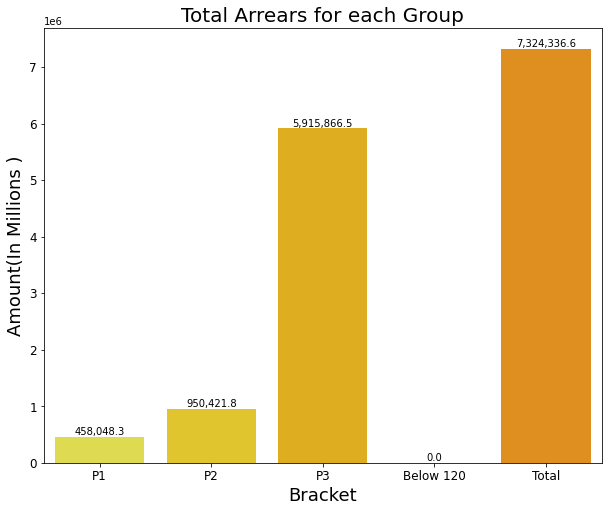

In [ ]:
#@title

summary2 = {
  'Bracket'  :['P1','P2','P3','Below 120','Total'],
  'Number of Accounts per Bracket'  :[p1_total,p2_total,p3_total,p0_total,bracket_sum],
  'Total Arrears'  :[p1,p2,p3,p0,sum],
  'Penalty' : [pen1,pen2,pen3,pen0,sum_penalty],
  'Grand Total' : [gt1,gt2,gt3,gt0,gt_t]
}
df2 = pd.DataFrame(summary2)


fig, ax = plt.subplots(figsize=(10,8))
sns.barplot("Bracket","Total Arrears", data = df2, ax=ax, palette = "Wistia")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Bracket', fontsize=18)
ax.set_ylabel('Amount(In Millions )', fontsize=18)
ax.set_title('Total Arrears for each Group', fontsize=20)
plt.text(0,df2[ 'Total Arrears' ][0], peso1, ha= "center", va = "bottom" )
plt.text(1,df2[ 'Total Arrears' ][1], peso2, ha= "center", va = "bottom" )
plt.text(2,df2[ 'Total Arrears' ][2], peso3, ha= "center", va = "bottom" )
plt.text(3,df2[ 'Total Arrears' ][3], peso0, ha= "center", va = "bottom" )
plt.text(4,df2[ 'Total Arrears' ][4], arrears_sum , ha= "center", va = "bottom" )
plt.show()


#<b>Data Visualization for Penalty of Accounts



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


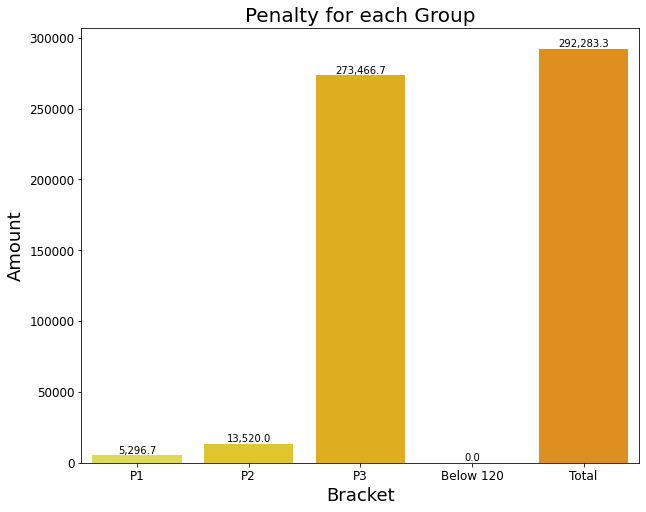

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot("Bracket","Penalty", data = df2, ax=ax, palette = "Wistia")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Bracket', fontsize=18)
ax.set_ylabel('Amount', fontsize=18)
ax.set_title('Penalty for each Group', fontsize=20)
plt.text(0,df2[ 'Penalty' ][0], penalty1, ha= "center", va = "bottom" )
plt.text(1,df2[ 'Penalty' ][1], penalty2, ha= "center", va = "bottom" )
plt.text(2,df2[ 'Penalty' ][2], penalty3, ha= "center", va = "bottom" )
plt.text(3,df2[ 'Penalty' ][3], penalty0, ha= "center", va = "bottom" )
plt.text(4,df2[ 'Penalty' ][4], sum_pen , ha= "center", va = "bottom" )
plt.show()


# <b>Data Visualization of Past-due Accounts

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(4, 102, '102')

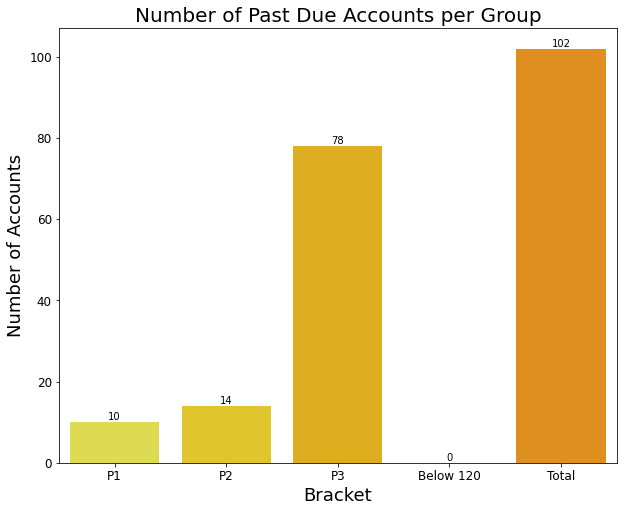

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot("Bracket","Number of Accounts per Bracket", data = df2, ax=ax, palette = "Wistia")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Bracket', fontsize=18)
ax.set_ylabel('Number of Accounts', fontsize=18)
ax.set_title('Number of Past Due Accounts per Group', fontsize=20)
plt.text(0,df2[ 'Number of Accounts per Bracket' ][0], p1_total, ha= "center", va = "bottom" )
plt.text(1,df2[ 'Number of Accounts per Bracket' ][1], p2_total, ha= "center", va = "bottom" )
plt.text(2,df2[ 'Number of Accounts per Bracket' ][2], p3_total, ha= "center", va = "bottom" )
plt.text(3,df2[ 'Number of Accounts per Bracket' ][3], p0_total, ha= "center", va = "bottom" )
plt.text(4,df2[ 'Number of Accounts per Bracket' ][4], bracket_sum, ha= "center", va = "bottom" )



# <b>Past-Due Accounts on Bracket P1

In [ ]:
#@title
p1_float =p1_data['Total Past Due'] = p1_data['Total Past Due'].str.replace(',','',n=1).astype(float)


In [ ]:
#@title

#data frame
p1_data.sort_values('Total Past Due',ascending=False).head(5)

##for display
#total past due
sorted_p1 = pd.DataFrame(p1_data.sort_values('Total Past Due',ascending=False).head(5))
sp1_1 = sorted_p1.values[0][26]
sp1_2= sorted_p1.values[1][26]
sp1_3= sorted_p1.values[2][26]
sp1_4= sorted_p1.values[3][26]
sp1_5= sorted_p1.values[4][26]
fp1_1=(format(sp1_1,",.1f"))
fp1_2=(format(sp1_2,",.1f"))
fp1_3=(format(sp1_3,",.1f"))
fp1_4=(format(sp1_4,",.1f"))
fp1_5=(format(sp1_5,",.1f"))

#name
np1_1 = sorted_p1.values[0][4]
np1_2 = sorted_p1.values[1][4]
np1_3 = sorted_p1.values[2][4]
np1_4 = sorted_p1.values[3][4]
np1_5 = sorted_p1.values[4][4]


#due date
dp1_1 = sorted_p1.values[0][13]
dp1_2 = sorted_p1.values[1][13]
dp1_3 = sorted_p1.values[2][13]
dp1_4 = sorted_p1.values[3][13]
dp1_5 = sorted_p1.values[4][13]

#last date paid
lp1_1=sorted_p1.values[0][17]
lp1_2 = sorted_p1.values[1][17]
lp1_3 = sorted_p1.values[2][17]
lp1_4 = sorted_p1.values[3][17]
lp1_5 = sorted_p1.values[4][17]

#DataFrame
p1_sorted = {
  'Name'  :[np1_1,np1_2,np1_3,np1_4,np1_5],
  'No. Past Due (in Days)'  :[dp1_1,dp1_2,dp1_3,dp1_4,dp1_5],
  'Last Date Paid'  :[lp1_1,lp1_2,lp1_3,lp1_4,lp1_5],
  'Total Past Due' : [fp1_1,fp1_2,fp1_3,fp1_4,fp1_5]
}
df_p1_sorted = pd.DataFrame(p1_sorted)
df_p1_sorted.head().style.set_table_styles(
    [{'selector': 'th',
      'props': [('background','#FFC733'),
                ('color','black'),
                ('font-family','verdana')]},

     {'selector': 'td',
       'props':[('font-family','verdana')]},

     {'selector': 'tr:nth-of-type(oddd)',
      'props':[('background','#DCDCDC')]},

     {'selector': 'tr:nth-of-type(even)',
      'props':[('background','white')]},

      {'selector': 'tr:hover',
      'props':[('background-color','#FFFC33 ')]},



    ]
).hide_index()


Name,No. Past Due (in Days),Last Date Paid,Total Past Due
"KIAK, CHARLIE",121,3/25/2022,"144,723.4"
"LOPENA, RUCIEL MARIE",174,1/31/2022,"59,521.4"
"PRESENTACION, JOSEPHINE",152,2/22/2022,"50,004.6"
"RIZO, MOLINA",142,3/4/2022,"37,631.0"
"MARCELINO, AIZA",174,1/31/2022,"36,140.6"


# <b>Top 5 Past-Due Accounts on Bracket P2

In [ ]:
#@title
p2_float =p2_data['Total Past Due'] = p2_data['Total Past Due'].str.replace(',','',n=1).astype(float)


In [ ]:
#@title
#data frame
p2_data.sort_values('Total Past Due',ascending=False).head(5)

##for display
#total past due
sorted_p2 = pd.DataFrame(p2_data.sort_values('Total Past Due',ascending=False).head(5))
sp2_1 = sorted_p2.values[0][26]
sp2_2= sorted_p2.values[1][26]
sp2_3= sorted_p2.values[2][26]
sp2_4= sorted_p2.values[3][26]
sp2_5= sorted_p2.values[4][26]
fp2_1=(format(sp2_1,",.1f"))
fp2_2=(format(sp2_2,",.1f"))
fp2_3=(format(sp2_3,",.1f"))
fp2_4=(format(sp2_4,",.1f"))
fp2_5=(format(sp2_5,",.1f"))

#name
np2_1 = sorted_p2.values[0][4]
np2_2 = sorted_p2.values[1][4]
np2_3 = sorted_p2.values[2][4]
np2_4 = sorted_p2.values[3][4]
np2_5 = sorted_p2.values[4][4]


#due date
dp2_1 = sorted_p2.values[0][13]
dp2_2 = sorted_p2.values[1][13]
dp2_3 = sorted_p2.values[2][13]
dp2_4 = sorted_p2.values[3][13]
dp2_5 = sorted_p2.values[4][13]

#last date paid
lp2_1=sorted_p2.values[0][17]
lp2_2 = sorted_p2.values[1][17]
lp2_3 = sorted_p2.values[2][17]
lp2_4 = sorted_p2.values[3][17]
lp2_5 = sorted_p2.values[4][17]

#DataFrame
p2_sorted = {
  'Name'  :[np2_1,np2_2,np2_3,np2_4,np2_5],
  'No. Past Due (in Days)'  :[dp2_1,dp2_2,dp2_3,dp2_4,dp2_5],
  'Last Date Paid'  :[lp2_1,lp2_2,lp2_3,lp2_4,lp2_5],
  'Total Past Due' : [fp2_1,fp2_2,fp2_3,fp2_4,fp2_5]
}
df_p2_sorted = pd.DataFrame(p2_sorted)
df_p2_sorted.head().style.set_table_styles(
    [{'selector': 'th',
      'props': [('background','#FFC733'),
                ('color','black'),
                ('font-family','verdana')]},

     {'selector': 'td',
       'props':[('font-family','verdana')]},

     {'selector': 'tr:nth-of-type(oddd)',
      'props':[('background','#DCDCDC')]},

     {'selector': 'tr:nth-of-type(even)',
      'props':[('background','white')]},

      {'selector': 'tr:hover',
      'props':[('background-color','#FFFC33 ')]},



    ]
).hide_index()


Name,No. Past Due (in Days),Last Date Paid,Total Past Due
"ALAMAG, CRISELDA",363,7/26/2021,"137,288.0"
"GENEBLAZO, ANA LIZA",227,12/9/2021,"116,430.4"
"LIBRIDO, MERLINDA",326,9/1/2021,"100,702.0"
"ABRATIGUE, MINERVA",215,12/21/2021,"100,224.9"
"ABRATIGUE, MINERVA",215,12/21/2021,"92,049.4"


# <b>Top 5 Past-Due Accounts on Bracket P3

In [ ]:
#@title
p3_float =p3_data['Total Past Due'] = p3_data['Total Past Due'].str.replace(',','',n=1).astype(float)


In [ ]:
#@title
#data frame
p2_data.sort_values('Total Past Due',ascending=False).head(5)

##for display
#total past due
sorted_p3 = pd.DataFrame(p3_data.sort_values('Total Past Due',ascending=False).head(5))
sp3_1 = sorted_p3.values[0][26]
sp3_2= sorted_p3.values[1][26]
sp3_3= sorted_p3.values[2][26]
sp3_4= sorted_p3.values[3][26]
sp3_5= sorted_p3.values[4][26]
fp3_1=(format(sp3_1,",.1f"))
fp3_2=(format(sp3_2,",.1f"))
fp3_3=(format(sp3_3,",.1f"))
fp3_4=(format(sp3_4,",.1f"))
fp3_5=(format(sp3_5,",.1f"))

#name
np3_1 = sorted_p3.values[0][4]
np3_2 = sorted_p3.values[1][4]
np3_3 = sorted_p3.values[2][4]
np3_4 = sorted_p3.values[3][4]
np3_5 = sorted_p3.values[4][4]


#due date
dp3_1 = sorted_p3.values[0][13]
dp3_2 = sorted_p3.values[1][13]
dp3_3 = sorted_p3.values[2][13]
dp3_4 = sorted_p3.values[3][13]
dp3_5 = sorted_p3.values[4][13]

#last date paid
lp3_1=sorted_p3.values[0][17]
lp3_2 = sorted_p3.values[1][17]
lp3_3 = sorted_p3.values[2][17]
lp3_4 = sorted_p3.values[3][17]
lp3_5 = sorted_p3.values[4][17]

#DataFrame
p3_sorted = {
  'Name'  :[np3_1,np3_2,np3_3,np3_4,np3_5],
  'No. Past Due (in Days)'  :[dp3_1,dp3_2,dp3_3,dp3_4,dp3_5],
  'Last Date Paid'  :[lp3_1,lp3_2,lp3_3,lp3_4,lp3_5],
  'Total Past Due' : [fp3_1,fp3_2,fp3_3,fp3_4,fp3_5]
}
df_p3_sorted = pd.DataFrame(p3_sorted)
df_p3_sorted.head().style.set_table_styles(
    [{'selector': 'th',
      'props': [('background','#FFC733'),
                ('color','black'),
                ('font-family','verdana')]},

     {'selector': 'td',
       'props':[('font-family','verdana')]},

     {'selector': 'tr:nth-of-type(oddd)',
      'props':[('background','#DCDCDC')]},

     {'selector': 'tr:nth-of-type(even)',
      'props':[('background','white')]},

      {'selector': 'tr:hover',
      'props':[('background-color','#FFFC33 ')]},



    ]
).hide_index()


Name,No. Past Due (in Days),Last Date Paid,Total Past Due
"REOTERAS, CHRISTINE","1,018",10/10/2019,"432,671.3"
"ALORO, ROJE","1,213",3/29/2019,"409,736.0"
"BERGANTE, LUIS REX",815,4/30/2020,"397,433.8"
"ARTIGA, RITCHIE",971,11/26/2019,"263,853.8"
"NEIS, JAZELLE",734,7/20/2020,"246,359.9"


#<b> Aging Summary


In [ ]:
#@title
conditions = [
              (market_data['No. of Past due (in days)'].str.replace(',','',n=1).astype(float)<30),
              (market_data['No. of Past due (in days)'].str.replace(',','',n=1).astype(float)>=31) & (market_data['No. of Past due (in days)'].str.replace(',','',n=1).astype(float)<=60),
              (market_data['No. of Past due (in days)'].str.replace(',','',n=1).astype(float)>=61) & (market_data['No. of Past due (in days)'].str.replace(',','',n=1).astype(float)<=90),
              (market_data['No. of Past due (in days)'].str.replace(',','',n=1).astype(float)>=91) & (market_data['No. of Past due (in days)'].str.replace(',','',n=1).astype(float)<=120),
              (market_data['No. of Past due (in days)'].str.replace(',','',n=1).astype(float)>=121)


]

values =['1-30 Days','31-60 Days','61-90 Days','91-120 Days ','Over 120 Days']

market_data['group']= np.select(conditions,values)
market_data

groupby_aging = market_data.groupby('group')
df_aging=pd.DataFrame({'counts': groupby_aging.size()})
df_aging

,counts
group,
Over 120 Days,102


#<b> Aging Data Visualization


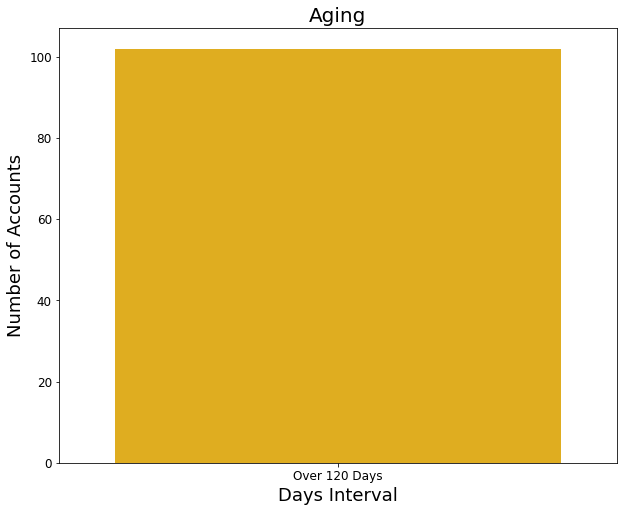

In [ ]:
#@title

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=market_data, x='group', ax=ax, palette = "Wistia",order = market_data['group'].value_counts().index)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Days Interval', fontsize=18)
ax.set_ylabel('Number of Accounts', fontsize=18)
ax.set_title('Aging', fontsize=20)
plt.show()

#<b> Summary of Account Officer Performance


In [ ]:
#@title
a1_data= pd.DataFrame(market_data[market_data['Account Officer']=="KRIS"])
a2_data= pd.DataFrame(market_data[market_data['Account Officer']=="MARY"])
a3_data= pd.DataFrame(market_data[market_data['Account Officer']=="CELLINI"])
a4_data= pd.DataFrame(market_data[market_data['Account Officer']=="CALVIN"])
a1_total = a1_data['Project'].count()
a2_total = a2_data['Project'].count()
a3_total = a3_data['Project'].count()
a4_total = a4_data['Project'].count()
p_sum= a1_total+a2_total+a3_total+a4_total

#Total arrears
p1a = a1_data[' Total Arrears '].str.replace(',','',n=1).astype(float).sum()
peso1= (format(p1,",.1f"))
p2a = a2_data[' Total Arrears '].str.replace(',','',n=1).astype(float).sum()
peso2= (format(p2,",.1f"))
p3a = a3_data[' Total Arrears '].str.replace(',','',n=1).astype(float).sum()
peso3= (format(p3,",.1f"))
p0a = a4_data[' Total Arrears '].str.replace(',','',n=1).astype(float).sum()
peso0= (format(p0,",.1f"))
suma = p1a+p2a+p3a+p0a
arrears_suma = (format(suma,",.1f"))

# total penalty
pen1_a = a1_data['Penalty (2%)'].str.replace(',','',n=1).astype(float).sum()
penalty1_a= (format(pen1_a,",.1f"))
pen2_a = a2_data['Penalty (2%)'].str.replace(',','',n=1).astype(float).sum()
penalty2_a= (format(pen2_a,",.1f"))
pen3_a = a3_data['Penalty (2%)'].str.replace(',','',n=1).astype(float).sum()
penalty3_a= (format(pen3_a,",.1f"))
pen0_a = a4_data['Penalty (2%)'].str.replace(',','',n=1).astype(float).sum()
penalty_a= (format(pen0_a,",.1f"))
sum_penalty_a = pen1_a+pen2_a+pen3_a+pen0_a
sum_pen_a= (format(sum_penalty,",.1f"))

#Grand total
gt1a  = p1a + pen1_a
gt_1a = (format(gt1,",.1f"))
gt2a  = p2a + pen2_a
gt_2a = (format(gt2a,",.1f"))
gt3a  = p3a + pen1_a
gt_3a = (format(gt3a,",.1f"))
gt0a  = p0a + pen0_a
gt_0a = (format(gt0a,",.1f"))
gt_ta = sum + sum_penalty_a
gt_totala = (format(gt_ta,",.1f"))

ao= {
  'Account Officer'  :['KRIS','MARY','CELLINI','CALVIN','TOTAL'],
  'Number of Accounts Per Officer'  :[a1_total,a2_total,a3_total,a4_total,p_sum],
  'Total Past Due Per Officer' : [gt_1a,gt_2a,gt_3a,gt_0a,gt_totala]
}
df_ao = pd.DataFrame(ao)
df_ao.head().style.set_table_styles(
    [{'selector': 'th',
      'props': [('background','#FFC733'),
                ('color','black'),
                ('font-family','verdana')]},

     {'selector': 'td',
       'props':[('font-family','verdana')]},

     {'selector': 'tr:nth-of-type(oddd)',
      'props':[('background','#DCDCDC')]},

     {'selector': 'tr:nth-of-type(even)',
      'props':[('background','white')]},

      {'selector': 'tr:hover',
      'props':[('background-color','#FFFC33 ')]},



    ]
).hide_index()


Account Officer,Number of Accounts Per Officer,Total Past Due Per Officer
KRIS,46,"463,345.0"
MARY,7,"706,634.8"
CELLINI,16,"1,152,841.0"
CALVIN,33,"3,573,179.2"
TOTAL,102,"7,616,619.9"


#<b>Data Visualization of Accounting Officer Performance


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(4, 102, '102')

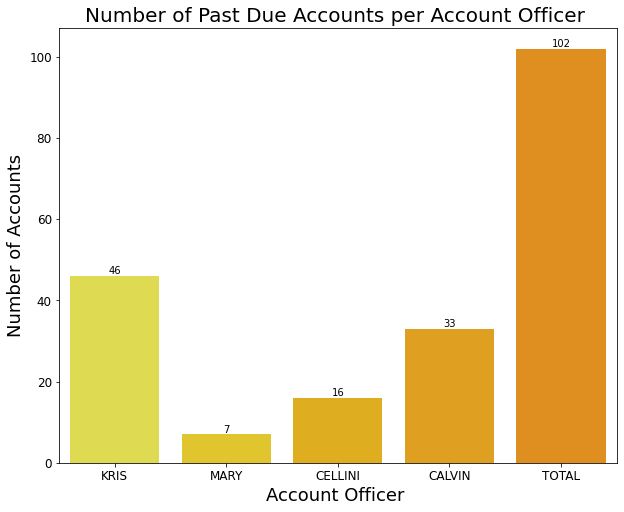

In [ ]:
#@title

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot("Account Officer","Number of Accounts Per Officer", data = df_ao, ax=ax, palette = "Wistia")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Account Officer ', fontsize=18)
ax.set_ylabel('Number of Accounts', fontsize=18)
ax.set_title('Number of Past Due Accounts per Account Officer ', fontsize=20)
plt.text(0,df_ao[ 'Number of Accounts Per Officer' ][0], a1_total, ha= "center", va = "bottom" )
plt.text(1,df_ao[ 'Number of Accounts Per Officer' ][1], a2_total, ha= "center", va = "bottom" )
plt.text(2,df_ao[ 'Number of Accounts Per Officer' ][2], a3_total, ha= "center", va = "bottom" )
plt.text(3,df_ao[ 'Number of Accounts Per Officer' ][3], a4_total, ha= "center", va = "bottom" )
plt.text(4,df_ao[ 'Number of Accounts Per Officer' ][4], p_sum, ha= "center", va = "bottom" )

